In [4]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

file_list = os.listdir('dataset')
data = []

for file in file_list:
    data.append(np.load(f'dataset/{file}'))

data = np.asarray(data)
print(data.shape)

(10000, 4, 64, 64)


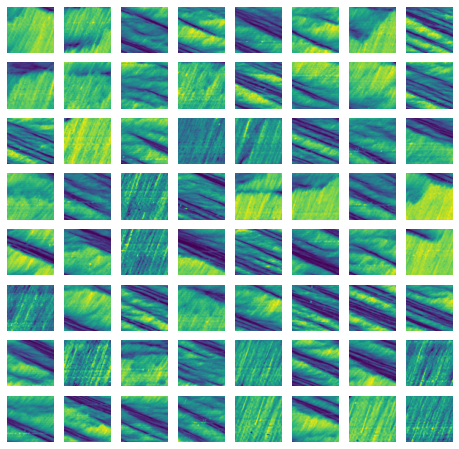

In [5]:
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(data[np.random.randint(data.shape[0])][0].T, origin="lower" )
        ax[i, j].axis("off")

In [6]:
data = torch.tensor(data, dtype=torch.float32)
data = data.permute(0, 1, 3, 2)

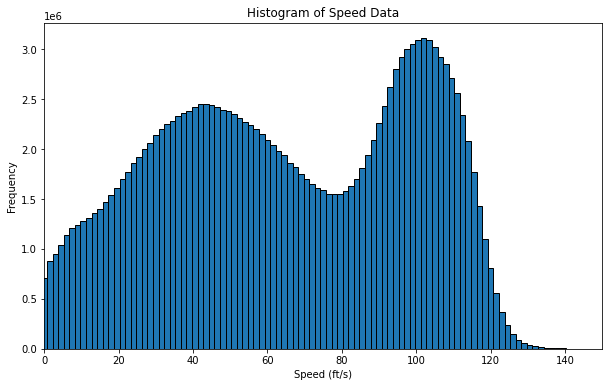

In [7]:
# Parameters for the histogram
num_bins = 100
range_min = 0
range_max = 150
bin_edges = np.linspace(range_min, range_max, num_bins + 1)

# Initialize an array to accumulate the histogram counts
hist_counts = np.zeros(num_bins)

# Process the array in chunks
chunk_size = 100  # Adjust chunk size based on your memory constraints
num_chunks = data.shape[0] // chunk_size

for i in range(num_chunks):
    chunk = data[i * chunk_size: (i + 1) * chunk_size]
    hist_counts += np.histogram(chunk, bins=bin_edges)[0]

# Process any remaining data that wasn't included in the chunks
if data.shape[0] % chunk_size != 0:
    remaining_data = data[num_chunks * chunk_size:]
    hist_counts += np.histogram(remaining_data, bins=bin_edges)[0]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_counts, width=bin_edges[1] - bin_edges[0], edgecolor='black')
plt.xlim(range_min, range_max)
plt.xlabel('Speed (ft/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Speed Data')
plt.show()

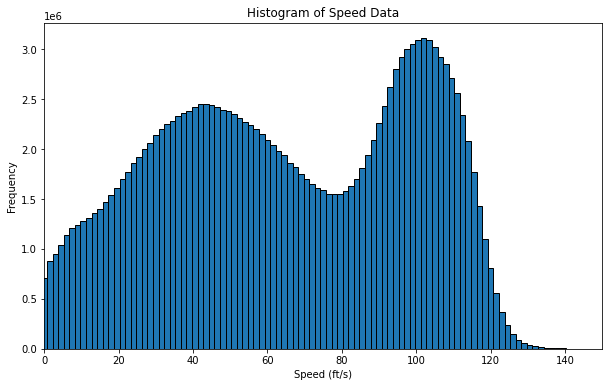

In [8]:
# Trim the dataset after 145 ft/s
data[data > 145] = 145

# Parameters for the histogram
num_bins = 100
range_min = 0
range_max = 150
bin_edges = np.linspace(range_min, range_max, num_bins + 1)

# Initialize an array to accumulate the histogram counts
hist_counts = np.zeros(num_bins)

# Process the array in chunks
chunk_size = 100  # Adjust chunk size based on your memory constraints
num_chunks = data.shape[0] // chunk_size

for i in range(num_chunks):
    chunk = data[i * chunk_size: (i + 1) * chunk_size]
    hist_counts += np.histogram(chunk, bins=bin_edges)[0]

# Process any remaining data that wasn't included in the chunks
if data.shape[0] % chunk_size != 0:
    remaining_data = data[num_chunks * chunk_size:]
    hist_counts += np.histogram(remaining_data, bins=bin_edges)[0]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_counts, width=bin_edges[1] - bin_edges[0], edgecolor='black')
plt.xlim(range_min, range_max)
plt.xlabel('Speed (ft/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Speed Data')
plt.show()

np.save("data.npy", data)